# Statistical Model Comparion
Statistical Model;
1. Kalman Forecasting
2. Theta Forecasting
3. Facebook Prophet
4. TES
5. SARIMA

## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/eda.csv", parse_dates=True)

In [3]:
df.dtypes

transaction_date      object
merchant_id            int64
Total_Transaction      int64
Total_Paid           float64
dtype: object

In [4]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [5]:
df.head()

,transaction_date,merchant_id,Total_Transaction,Total_Paid
0,2018-01-01,535,349,25883.226
1,2018-01-01,42616,141,40918.860
2,2018-01-01,46774,410,306902.700
3,2018-01-01,86302,10,11.340
4,2018-01-01,124381,285,111383.766


In [6]:
df_535 = df[df["merchant_id"] == 535][["transaction_date", "Total_Transaction"]]

In [7]:
df_535.head()

,transaction_date,Total_Transaction
0,2018-01-01,349
6,2018-01-02,729
12,2018-01-03,657
18,2018-01-04,706
25,2018-01-05,648


In [8]:
from darts import TimeSeries

In [9]:
series = TimeSeries.from_dataframe(df_535, time_col="transaction_date", value_cols="Total_Transaction")

In [10]:
series

<TimeSeries (DataArray) (transaction_date: 1096, component: 1, sample: 1)>
array([[[ 349.]],

       [[ 729.]],

       [[ 657.]],

       ...,

       [[1537.]],

       [[1353.]],

       [[ 838.]]])
Coordinates:
  * transaction_date  (transaction_date) datetime64[ns] 2018-01-01 ... 2020-1...
  * component         (component) object 'Total_Transaction'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Checking Seasonality

In [11]:
from _utils.ts._dart._dart_utils import Smoother

In [12]:
smooth = Smoother(series, percentage=pd.Timestamp("2020-10-01"))

In [13]:
season_periods = smooth.get_season_period(season_range=366)

2023-04-29 18:14:53,395 - _utils.logging_utils - DEBUG - get_season_period is executing...
2023-04-29 18:14:53,601 - _utils.logging_utils - INFO - Expected Seasonality Periods: 
[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336]


## Kalman Forecasting

In [14]:
from _utils.ts._dart._statistics_utils import KalmanDart

In [15]:
kalman = KalmanDart(series, percentage=pd.Timestamp("2020-10-01"))

In [16]:
optimized = kalman.optimize_optuna(epoch=150, x_dim_epoch=150)

2023-04-29 17:46:52,392 - _utils.logging_utils - DEBUG - Kalman is optimizing...


[I 2023-04-29 17:46:52,393] A new study created in memory with name: no-name-59d8880b-f446-4a0f-9ed2-950830358d06
C:\Users\talha\anaconda3\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2023-04-29 17:46:54,242] Trial 4 finished with value: 457.9219159551978 and parameters: {'dim_x': 1}. Best is trial 4 with value: 457.9219159551978.
[I 2023-04-29 17:46:54,251] Trial 5 finished with value: 476.71644573779014 and parameters: {'dim_x': 10}. Best is trial 4 with value: 457.9219159551978.
[I 2023-04-29 17:46:54,315] Trial 6 finished with value: 420.871319913521 and parameters: {'dim_x': 3}. Best is trial 6 with value: 420.871319913521.
[I 2023-04-29 17:46:55,697] Trial 9 finished with value: 457.9219159551978 and parameters: {'dim_x': 1}. Best is trial 6 with value: 420.871319913521.
[I 2023-04-29 17:46:57,523] Trial 3 finished with value: 497.692169300707 and parameters: {'dim_x': 23}. Best is trial 6 with value: 420.871319913521.
[I 2023-04-29 17:46:57,879] Trial 7 finished with value: 516.3404677336662 and parameters: {'dim_x': 35}. Best is trial 6 with value: 420.871319913521.
[I 2023-04-29 17:46:57,973] Trial 2 finished with value: 511.43814462269216 and parameters

In [17]:
optimized.best_params

{'dim_x': 68}

2023-04-29 17:49:45,273 - _utils.logging_utils - DEBUG - KalmanForecaster is executing...
2023-04-29 17:49:45,275 - _utils.logging_utils - DEBUG - KalmanForecaster(dim_x=68) is evaluating...
2023-04-29 17:49:45,715 - _utils.logging_utils - INFO - Error metrics: 
{'MAE': 343.56609173987357, 'MAPE': 22.28071699452796, 'SMAPE': 18.131775733988977, 'R2': -1.337934531045386, 'Time': 0.44}
2023-04-29 17:49:45,716 - _utils.logging_utils - INFO - 
KalmanForecaster(dim_x=68) evaluated.
Taken time: 0.4398979000397958


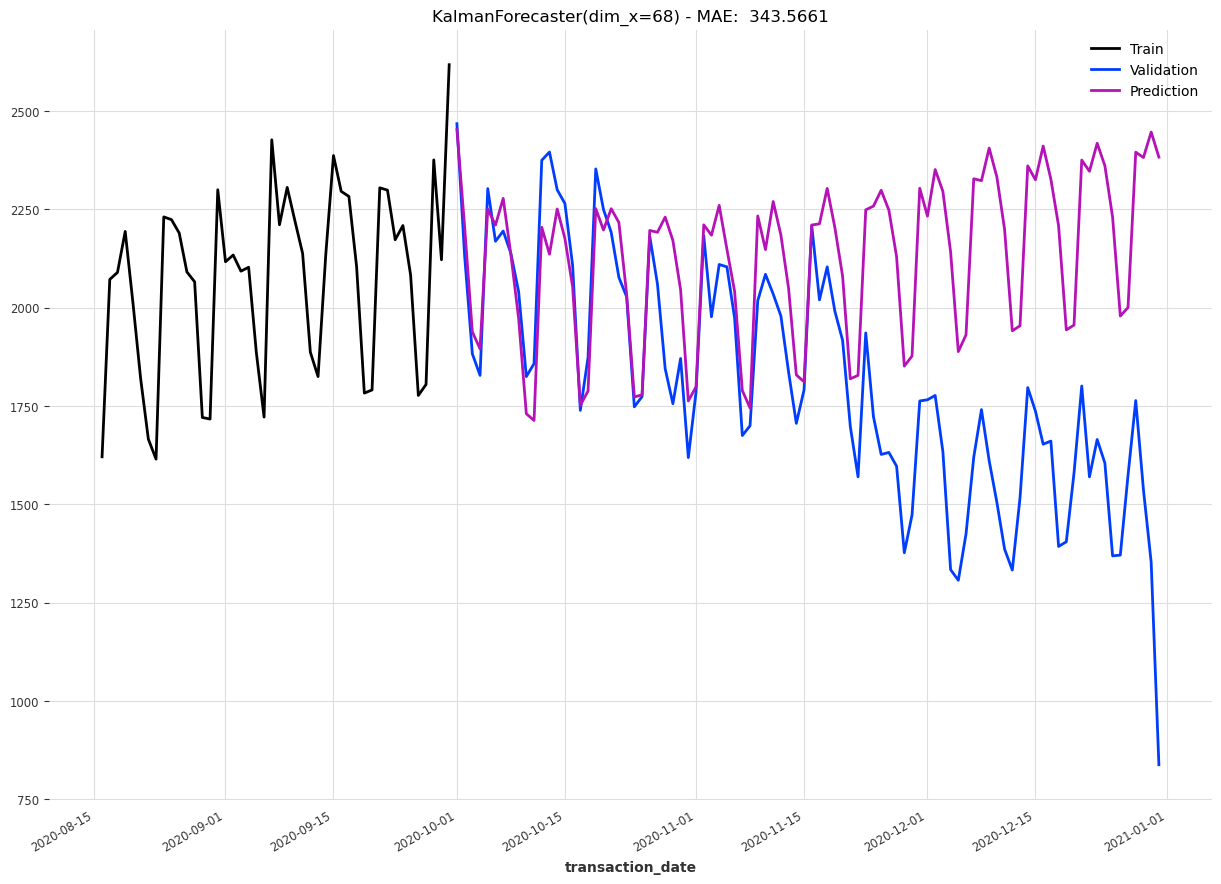

(KalmanForecaster(dim_x=68, kf=None, add_encoders=None),
 <TimeSeries (DataArray) (transaction_date: 92, component: 1, sample: 1)>
 array([[[2453.07051751]],
 
        [[2205.6071844 ]],
 
        [[1938.75324089]],
 
        [[1895.51055364]],
 
        [[2250.91146933]],
 
        [[2210.18330998]],
 
        [[2278.04776623]],
 
        [[2134.72582589]],
 
        [[1973.20019741]],
 
        [[1730.38866917]],
 
 ...
 
        [[2347.02302115]],
 
        [[2418.29400025]],
 
        [[2361.14789217]],
 
        [[2230.38073656]],
 
        [[1978.96191514]],
 
        [[2000.71964618]],
 
        [[2395.62337421]],
 
        [[2382.042228  ]],
 
        [[2446.83937012]],
 
        [[2383.04412166]]])
 Coordinates:
   * transaction_date  (transaction_date) datetime64[ns] 2020-10-01 ... 2020-1...
   * component         (component) object 'Total_Transaction'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 {'MAE': 34

In [18]:
kalman.smooth(**optimized.best_params)

## Theta Forecasting

In [17]:
from _utils.ts._dart._statistics_utils import ThetaDart
import warnings

warnings.filterwarnings("ignore")

In [20]:
theta = ThetaDart(series, percentage=pd.Timestamp("2020-10-01"))

In [22]:
optimized = theta.optimize_optuna(periods=season_periods, epoch=300)

2023-04-29 17:50:22,082 - _utils.logging_utils - DEBUG - Theta is optimizing...


[I 2023-04-29 17:50:22,083] A new study created in memory with name: no-name-295b8754-3962-458a-99d9-4b0010b980c2


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2023-04-29 17:50:22,397] Trial 2 finished with value: 389.41638451675516 and parameters: {'theta': 11.393939393939394, 'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>, 'season_mode': <SeasonalityMode.ADDITIVE: 'additive'>, 'model_mode': <ModelMode.ADDITIVE: 'additive'>, 'seasonality_period': 224}. Best is trial 2 with value: 389.41638451675516.
[I 2023-04-29 17:50:22,449] Trial 1 finished with value: 378.41351618825644 and parameters: {'theta': -6.18181818181818, 'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>, 'season_mode': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'model_mode': <ModelMode.MULTIPLICATIVE: 'multiplicative'>, 'seasonality_period': 77}. Best is trial 1 with value: 378.41351618825644.
[I 2023-04-29 17:50:22,529] Trial 4 finished with value: 534.2305707447277 and parameters: {'theta': 9.777777777777779, 'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>, 'season_mode': <SeasonalityMode.ADDITIVE: 'additive'>, 'model_mode': <ModelMode.ADDITIVE: 'add

2023-04-29 17:51:01,645 - _utils.logging_utils - DEBUG - Theta is executing...
2023-04-29 17:51:01,646 - _utils.logging_utils - DEBUG - FourTheta(theta=0.28282828282828376, seasonality_period=252, season_mode=SeasonalityMode.ADDITIVE, model_mode=ModelMode.MULTIPLICATIVE, trend_mode=TrendMode.EXPONENTIAL) is evaluating...
2023-04-29 17:51:01,720 - _utils.logging_utils - INFO - Error metrics: 
{'MAE': 112.69338412874467, 'MAPE': 6.846391499481073, 'SMAPE': 6.568833228929914, 'R2': 0.7591750320048785, 'Time': 0.074}
2023-04-29 17:51:01,721 - _utils.logging_utils - INFO - 
FourTheta(theta=0.28282828282828376, seasonality_period=252, season_mode=SeasonalityMode.ADDITIVE, model_mode=ModelMode.MULTIPLICATIVE, trend_mode=TrendMode.EXPONENTIAL) evaluated.
Taken time: 0.07371149997925386


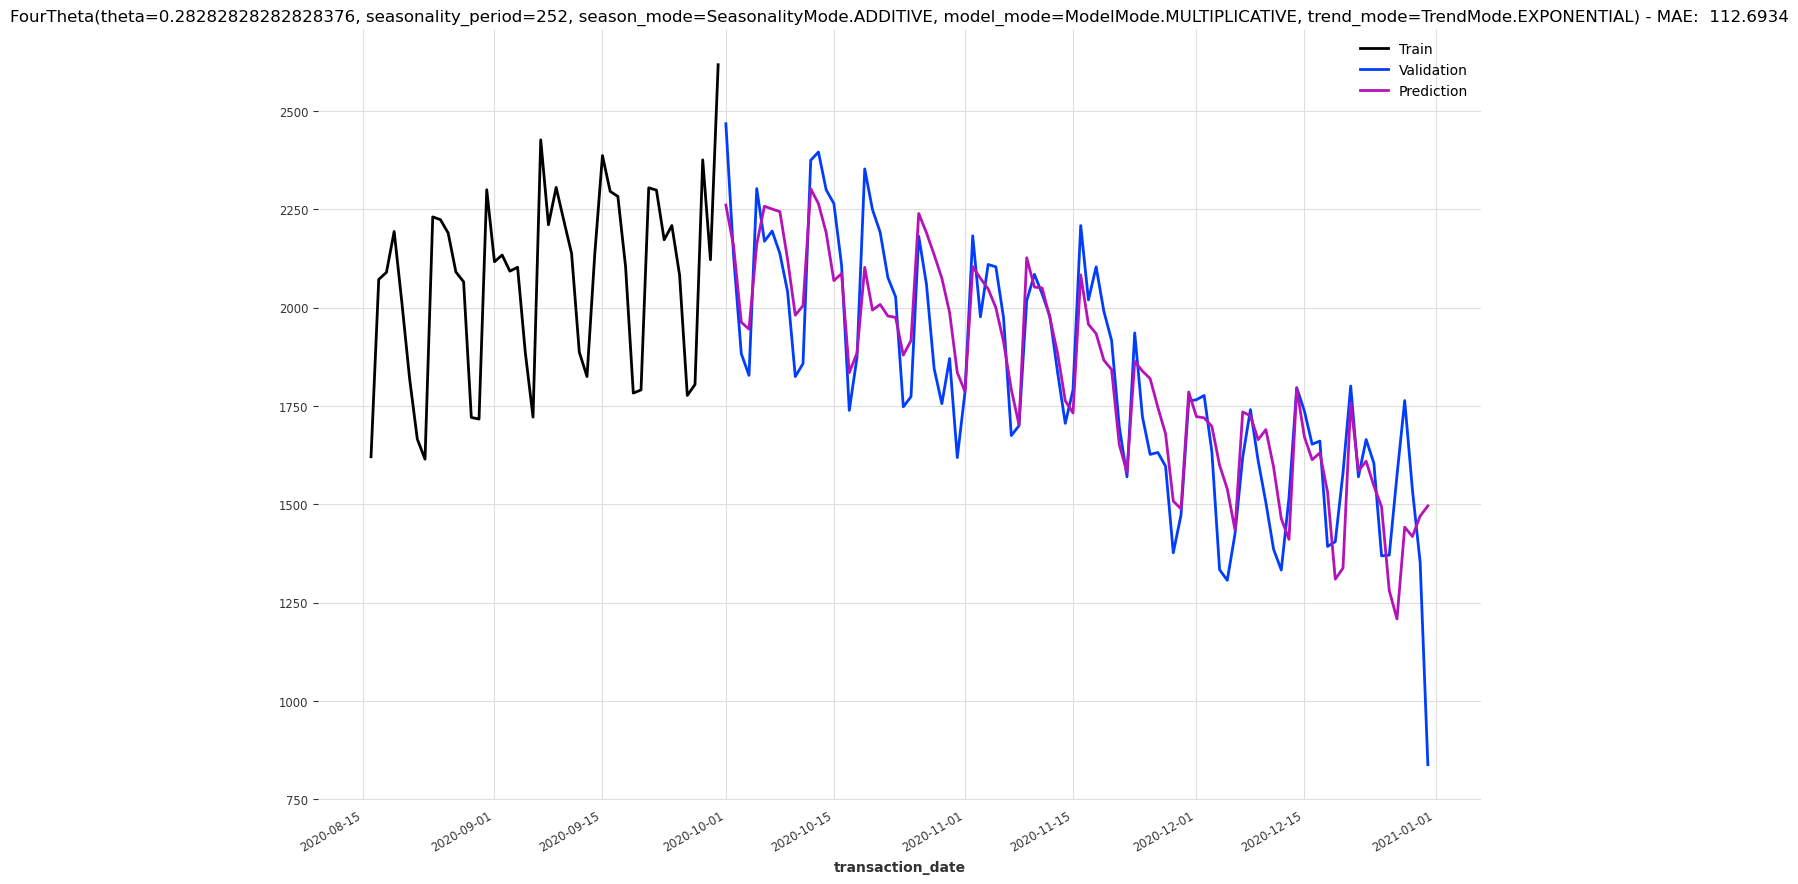

(FourTheta(theta=0.28282828282828376, seasonality_period=252, season_mode=SeasonalityMode.ADDITIVE, model_mode=ModelMode.MULTIPLICATIVE, trend_mode=TrendMode.EXPONENTIAL, normalization=True),
 <TimeSeries (DataArray) (transaction_date: 92, component: 1, sample: 1)>
 array([[[2261.17697428]],
 
        [[2156.42258648]],
 
        [[1963.15698521]],
 
        [[1945.66120908]],
 
        [[2161.26572816]],
 
        [[2258.14375367]],
 
        [[2250.9320093 ]],
 
        [[2244.47717572]],
 
        [[2123.03615197]],
 
        [[1980.95214676]],
 
 ...
 
        [[1585.08056641]],
 
        [[1609.7208362 ]],
 
        [[1547.40306026]],
 
        [[1493.50964244]],
 
        [[1280.75532793]],
 
        [[1208.5383938 ]],
 
        [[1442.11674021]],
 
        [[1418.2963825 ]],
 
        [[1470.2623044 ]],
 
        [[1496.05960874]]])
 Coordinates:
   * transaction_date  (transaction_date) datetime64[ns] 2020-10-01 ... 2020-1...
   * component         (component) object 'Total_Tra

In [23]:
theta.smooth(**optimized.best_params, plot=1)

In [24]:
optimized.best_params

{'theta': 0.28282828282828376,
 'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>,
 'season_mode': <SeasonalityMode.ADDITIVE: 'additive'>,
 'model_mode': <ModelMode.MULTIPLICATIVE: 'multiplicative'>,
 'seasonality_period': 252}

## Facebook Prophet

In [29]:
from _utils.ts._dart._statistics_utils import ProphetDart

In [30]:
proph = ProphetDart(series, percentage=pd.Timestamp("2020-10-01"))

In [34]:
seasonality = dict({
            'name': "custom_period",  # (name of the seasonality component),
            'seasonal_periods': 252,  # (nr of steps composing a season),
            'fourier_order': 1  # (number of Fourier components to use),
            })

2023-04-29 17:40:41,450 - _utils.logging_utils - DEBUG - Prophet is executing...
2023-04-29 17:40:41,452 - _utils.logging_utils - DEBUG - Prophet(add_seasonalities={'name': 'custom_period', 'seasonal_periods': 252, 'fourier_order': 1}, growth=linear) is evaluating...


17:40:41 - cmdstanpy - INFO - Chain [1] start processing
17:40:41 - cmdstanpy - INFO - Chain [1] done processing


2023-04-29 17:40:41,947 - _utils.logging_utils - INFO - Error metrics: 
{'MAE': 162.91982056939767, 'MAPE': 10.337154808230215, 'SMAPE': 9.3628208777979, 'R2': 0.4898486461827809, 'Time': 0.494}
2023-04-29 17:40:41,948 - _utils.logging_utils - INFO - 
Prophet Model evaluated.
Taken time: 0.4943290000082925


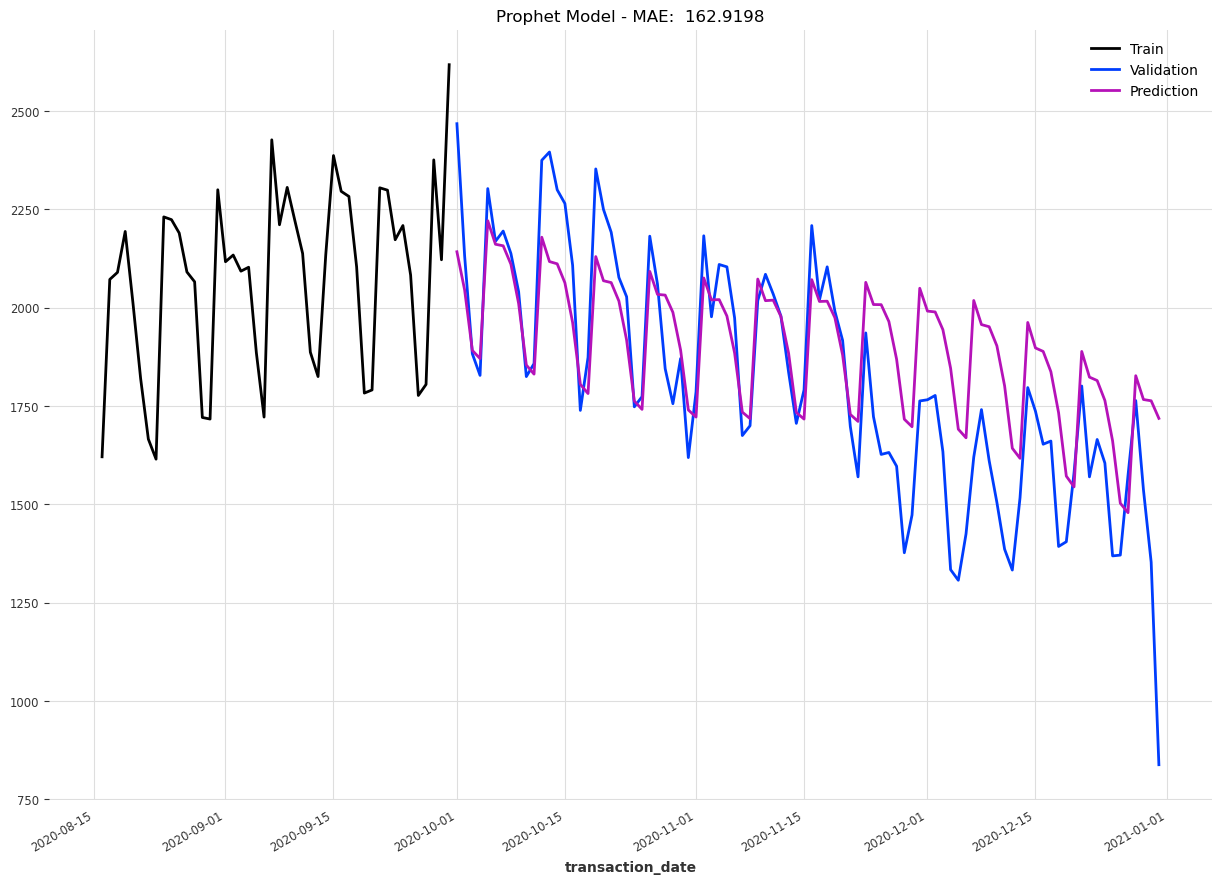

(Prophet(add_seasonalities={'name': 'custom_period', 'seasonal_periods': 252, 'fourier_order': 1}, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None, growth=linear, holidays=None),
 <TimeSeries (DataArray) (transaction_date: 92, component: 1, sample: 1)>
 array([[[2142.35377825]],
 
        [[2045.35237087]],
 
        [[1891.46190011]],
 
        [[1870.80759332]],
 
        [[2221.26834476]],
 
        [[2161.4503835 ]],
 
        [[2157.5139528 ]],
 
        [[2110.6363891 ]],
 
        [[2010.89896473]],
 
        [[1854.3586523 ]],
 
 ...
 
        [[1823.57718905]],
 
        [[1814.89705504]],
 
        [[1764.1196884 ]],
 
        [[1661.41301045]],
 
        [[1502.90840877]],
 
        [[1478.84369883]],
 
        [[1827.19442957]],
 
        [[1766.64470394]],
 
        [[1763.41144851]],
 
        [[1718.70558812]]])
 Coordinates:
   * transaction_date  (transaction_date) datetime64[ns] 2020-10-01 ... 2020-1...
   * component     

In [35]:
proph.smooth(add_seasonalities=seasonality, plot=1)

## TES

In [25]:
from _utils.ts._dart._statistics_utils import ExponentialSmoothingDart

In [26]:
tes = ExponentialSmoothingDart(series, percentage=pd.Timestamp("2020-10-01"))

In [27]:
optimized = tes.optimize_optuna(periods=season_periods, epoch=100)

2023-04-29 17:51:35,303 - _utils.logging_utils - DEBUG - TES is optimizing...


[I 2023-04-29 17:51:35,304] A new study created in memory with name: no-name-65b77bb9-8446-4582-bb96-5230823a5f24


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-04-29 17:51:42,833] Trial 2 finished with value: 184356104620954.25 and parameters: {'period': 14, 'smoothing_level': 0.8997107742998659, 'smoothing_trend': 0.3121336962777315, 'smoothing_seasonal': 0.8667858662829673, 'method': 'SLSQP'}. Best is trial 2 with value: 184356104620954.25.
[I 2023-04-29 17:51:45,932] Trial 3 finished with value: 6797.974788312843 and parameters: {'period': 182, 'smoothing_level': 0.9986194756810195, 'smoothing_trend': 0.23562315708248904, 'smoothing_seasonal': 0.6091961026710895, 'method': 'Powell'}. Best is trial 3 with value: 6797.974788312843.
[I 2023-04-29 17:51:46,943] Trial 1 finished with value: 3876.397415841073 and parameters: {'period': 154, 'smoothing_level': 0.10275869652066341, 'smoothing_trend': 0.7935560593453643, 'smoothing_seasonal': 0.15186510711852974, 'method': 'Powell'}. Best is trial 1 with value: 3876.397415841073.
[I 2023-04-29 17:51:47,104] Trial 0 finished with value: 6281.281226681925 and parameters: {'period': 91, 'smoot

In [30]:
params = optimized.best_params
params

{'period': 133,
 'smoothing_level': 0.08923501021635089,
 'smoothing_trend': 0.1549716356739671,
 'smoothing_seasonal': 0.2779642424586245,
 'method': 'SLSQP'}

2023-04-29 17:56:59,611 - _utils.logging_utils - DEBUG - TES is executing...
2023-04-29 17:56:59,612 - _utils.logging_utils - DEBUG - ExponentialSmoothing(seasonal_periods=133, smoothing_level=0.08923501021635089, smoothing_trend=0.1549716356739671, smoothing_seasonal=0.2779642424586245, method=SLSQP) is evaluating...
2023-04-29 17:57:00,262 - _utils.logging_utils - INFO - Error metrics: 
{'MAE': 109.77856673605008, 'MAPE': 6.704388548550254, 'SMAPE': 6.555665494393072, 'R2': 0.7713308175366502, 'Time': 0.65}
2023-04-29 17:57:00,263 - _utils.logging_utils - INFO - 
ExponentialSmoothing(seasonal_periods=133, smoothing_level=0.08923501021635089, smoothing_trend=0.1549716356739671, smoothing_seasonal=0.2779642424586245, method=SLSQP) evaluated.
Taken time: 0.6497964000445791


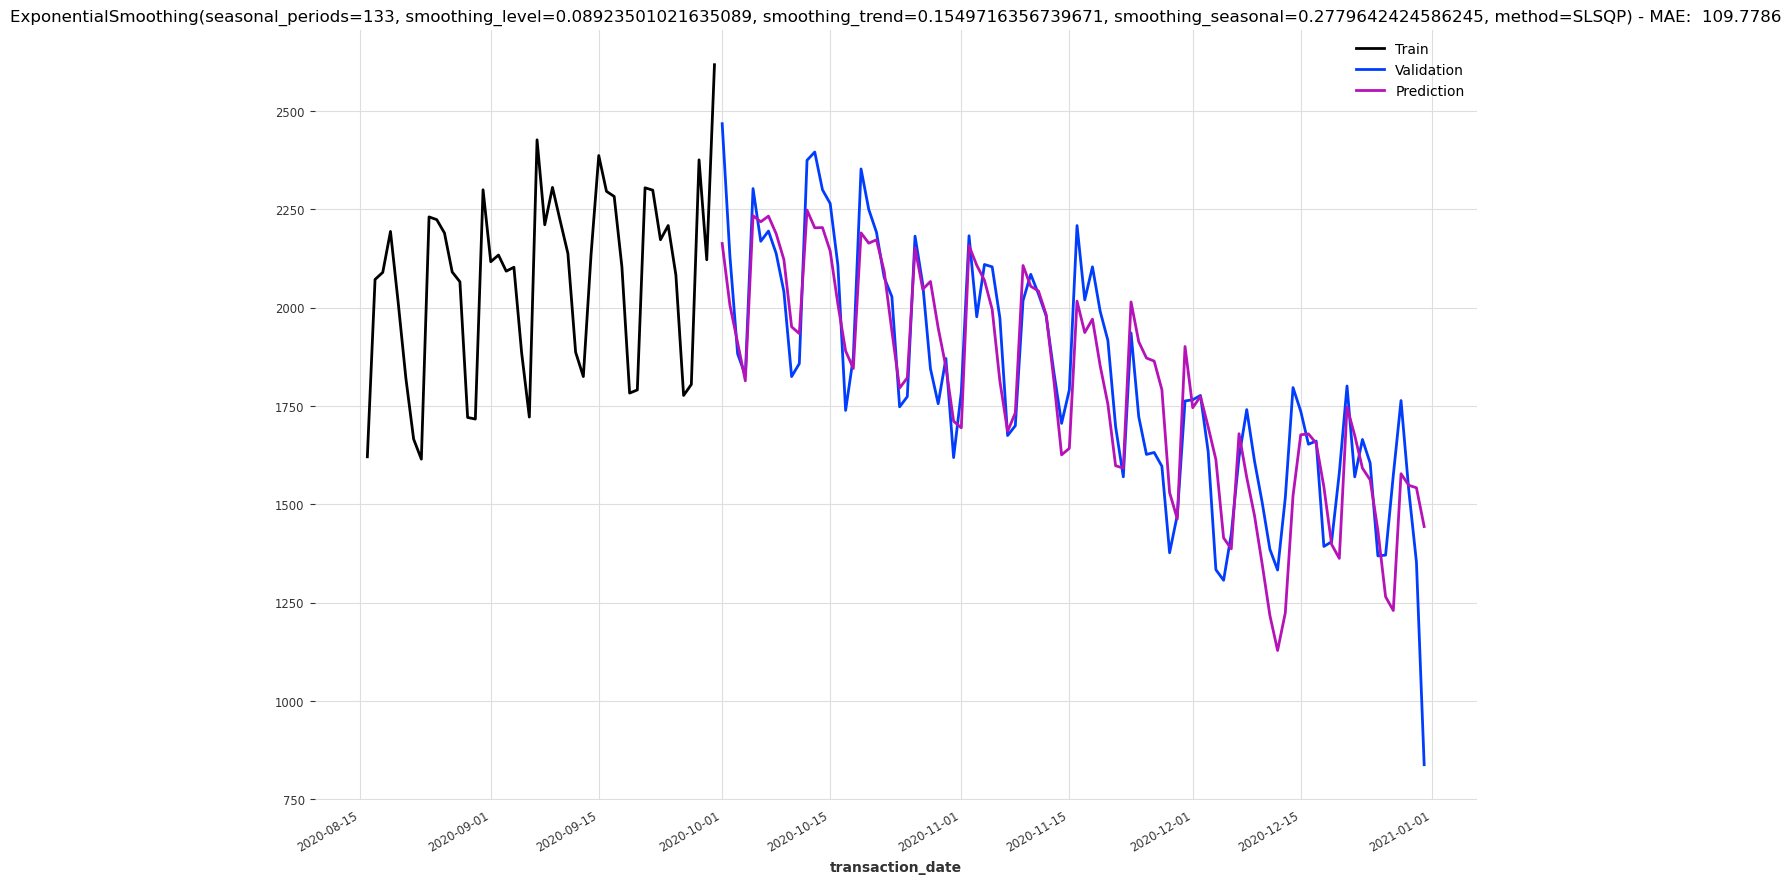

(ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=133, random_state=0, smoothing_level=0.08923501021635089, smoothing_trend=0.1549716356739671, smoothing_seasonal=0.2779642424586245, method=SLSQP),
 <TimeSeries (DataArray) (transaction_date: 92, component: 1, sample: 1)>
 array([[[2163.40324004]],
 
        [[2006.51491721]],
 
        [[1911.45020272]],
 
        [[1814.1901975 ]],
 
        [[2234.10346586]],
 
        [[2218.63463008]],
 
        [[2232.97227164]],
 
        [[2188.08612337]],
 
        [[2122.46426366]],
 
        [[1951.53618975]],
 
 ...
 
        [[1675.24571436]],
 
        [[1592.06167509]],
 
        [[1562.29025022]],
 
        [[1433.99560047]],
 
        [[1265.15989146]],
 
        [[1230.07902347]],
 
        [[1577.91367703]],
 
        [[1548.5755129 ]],
 
        [[1542.20447282]],
 
        [[1443.69611906]]])
 Coordinates:
   * transaction_date  (transaction_date) datetime64[ns] 2020-10

In [32]:
tes.smooth(periods=[params["period"]],
           smoothing_level=params["smoothing_level"],
           smoothing_seasonal=params["smoothing_seasonal"],
           smoothing_trend=params["smoothing_trend"],
           plot=1)

## SARIMA

In [14]:
from _utils.ts._dart._statistics_utils import SARIMADart

In [15]:
sarima = SARIMADart(series, percentage=pd.Timestamp("2020-10-01"))

In [ ]:
optimized = sarima.optimize_optuna(periods=season_periods)

2023-04-29 18:15:34,001 - _utils.logging_utils - DEBUG - SARIMA is optimizing...


[I 2023-04-29 18:15:34,002] A new study created in memory with name: no-name-01a97bbf-7549-4136-a1dd-764a777d62a6


  0%|          | 0/100 [00:00<?, ?it/s]